In [3]:
using LinearAlgebra

α = 1.1
β = 1.5
c = 3.0

function interval(ν1, ν2)
    frequencyRatio = ν2 / ν1
    interval = log((2^(1/12)), frequencyRatio)
end

function dissonance(ν)
    ν = abs(ν)
    return c*(c^(-α*ν) - c^(-β*ν))
end

function dissonance(harmonics, amplitudes, tones)

    F = harmonics * transpose(tones)
    A = amplitudes * transpose(ones(length(tones)))
    
    dissonances =  [ dissonance(interval(f1, f2)) for f1 in F for f2 in F ]
    weights = [ a1 * a2 for a1 in A for a2 in A ]
                            
    return dot(dissonances, weights)
    
end

function dissonanceCurve(timbre, weights, range)
    
    result = [ dissonance(timbre, weights, [first(range), x]) for x in range]
    
    return result #/ maximum(result)
end


dissonanceCurve (generic function with 1 method)

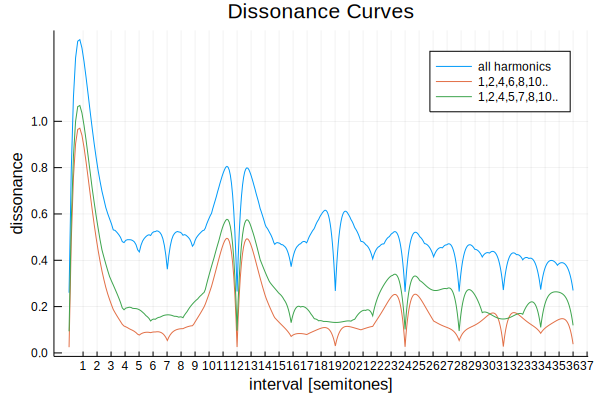

In [4]:
using Plots
#using PlotlyJS

X =  220.0:2.0:(8*220.0)

frequencies = [ h for h in 1:20]

amplitudes  = [1/i for i in 1:length(frequencies)]
amplitudes2 = [1/i for i in 1:length(frequencies)]
amplitudes3 = [1/i for i in 1:length(frequencies)]
amplitudes4 = [1/i for i in 1:length(frequencies)]


amplitudes2[3:2:end] = zeros(length(amplitudes2[3:2:end])) #cut 3,5,7... harmonics
amplitudes3[3:3:end] = zeros(length(amplitudes3[3:3:end])) #cut 3,6,9... harmonics


frequencies4 = [ h for h in 1:20]

frequencies4 = frequencies4 .+ 20.0 #- 10*rand(length(frequencies4))

Y = dissonanceCurve(frequencies, amplitudes, X)
Y2 = dissonanceCurve(frequencies, amplitudes2, X)
Y3 = dissonanceCurve(frequencies, amplitudes3, X)
Y4 = dissonanceCurve(frequencies, [1.0/i^0.8 for i in 1:length(frequencies)], X)

X = log.(2^(1/12),X./220.0)
#Y = Y = log.(2,Y)
plot(X, hcat(Y, Y2, Y3),
    title="Dissonance Curves",
    label=["all harmonics" "1,2,4,6,8,10.." "1,2,4,5,7,8,10.." "drift"],
    xticks=1:1:(4*12),
    yticks=0.0:0.2:1.0,
    ylabel="dissonance",
    xlabel="interval [semitones]")


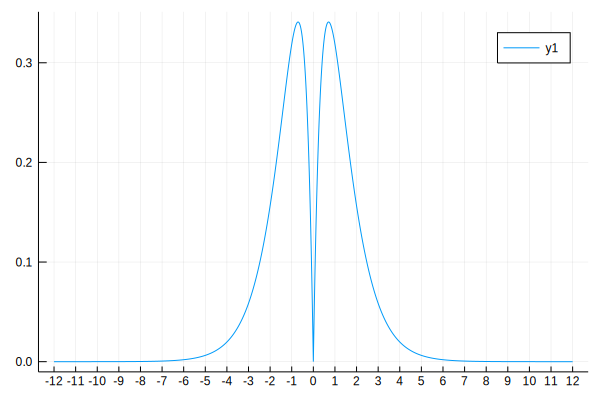

In [5]:
octave = -12:0.01:12
plot(octave, dissonance.(octave), xticks=-12:1:12)

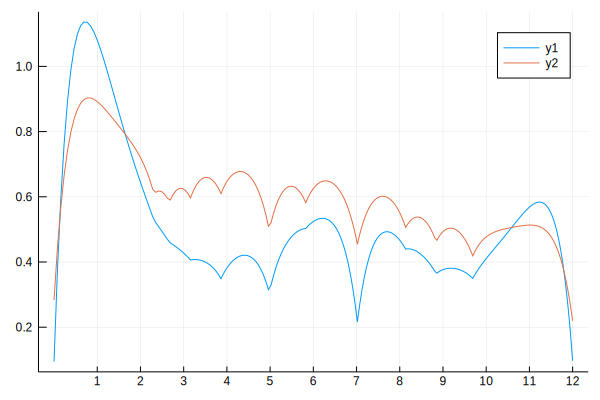

In [7]:
using Plots


X =  220.0:1.0:440.0

harmonics = [ 1.0, 2.0, 3.0/2.0, 4.0, 5.0/2.0, 3.0, 7.0/2.0 ]

weights = [1/i for i in 1:length(harmonics)]
weights2 = [0.35 for i in 1:length(harmonics)]

Y = dissonanceCurve(harmonics, weights, X)
Y2 = dissonanceCurve(harmonics, weights2, X)

X = log.(2^(1/12),X./220.0)

plot(X,[Y, Y2], xticks=1:12)

